# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [3]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [12]:
from utils import get_train_input

In [13]:
train_dataset = get_train_input("/app/project/experiments/improvement1/pipeline_imp1.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/data/train/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord', '/app/data/train/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord', '/app/data/train/segment-10596949720463106554_1933_530_1953_530_with_camera_labels.tfrecord', '/app/data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', '/app/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/app/data/train/segment-10664823084372323928_4360_000_4380_000_with_camera_labels.tfrecord', '/app/data/train/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord', '/app/data/train/segment-12174529769287588121_3848_440_3868_440_with_camera_labels.tfrecord', '/app/data/train/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord', '/app/data/train/segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord', '/app/data/tra

INFO:tensorflow:Number of filenames to read: 85
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


2023-01-06 19:58:40.109333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


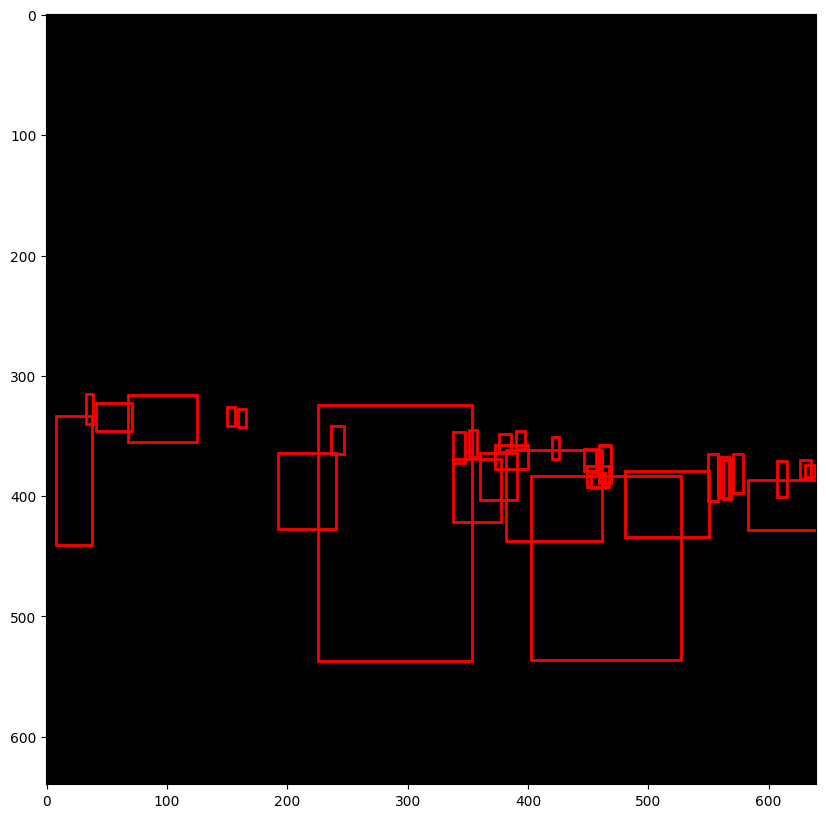

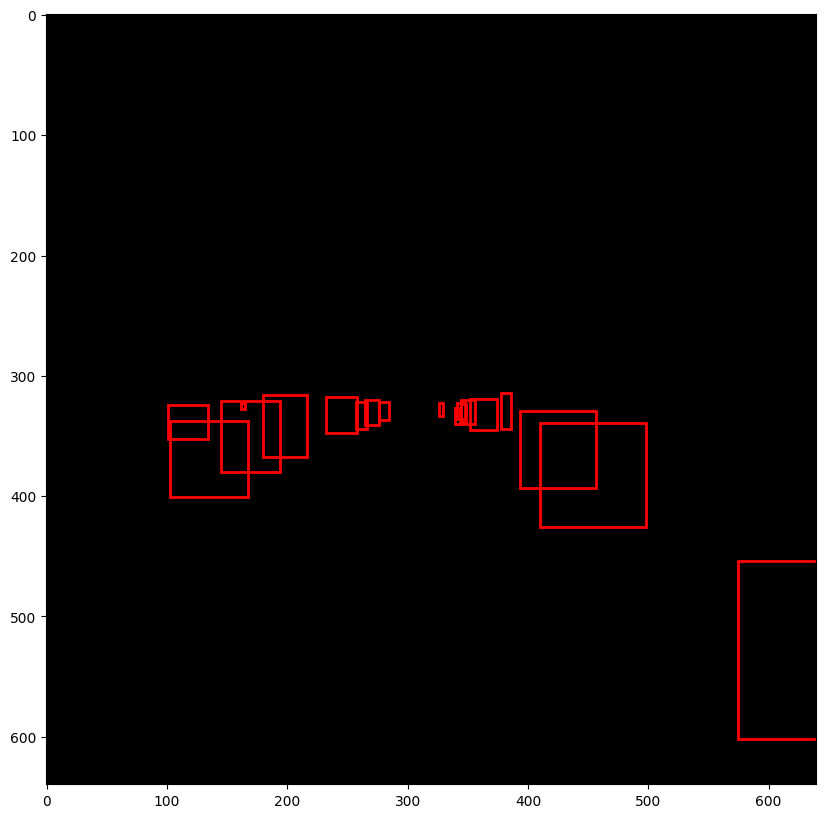

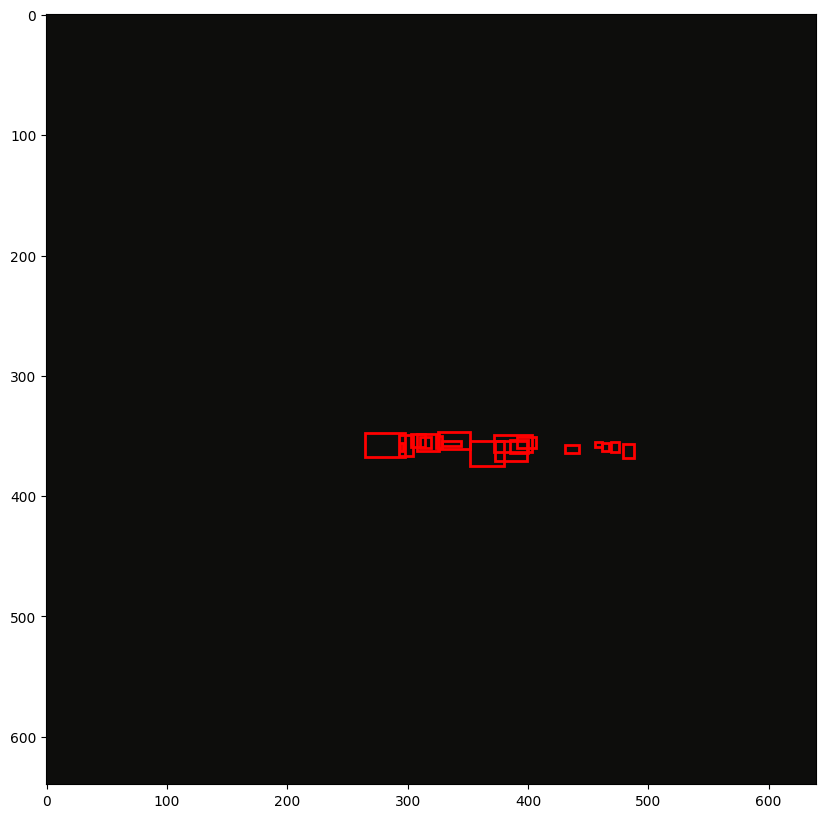

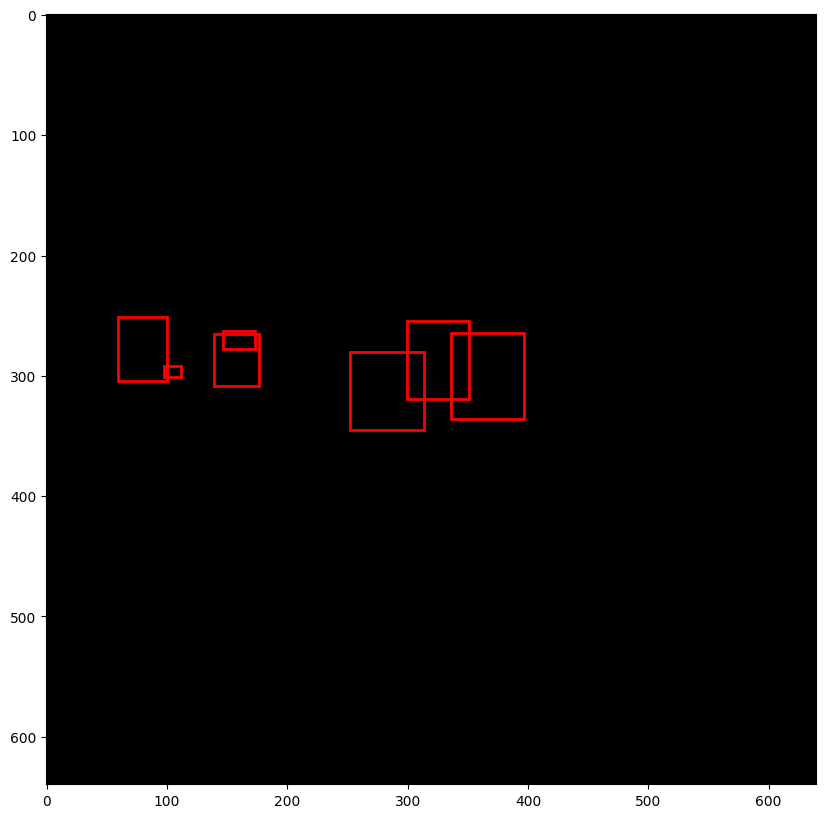

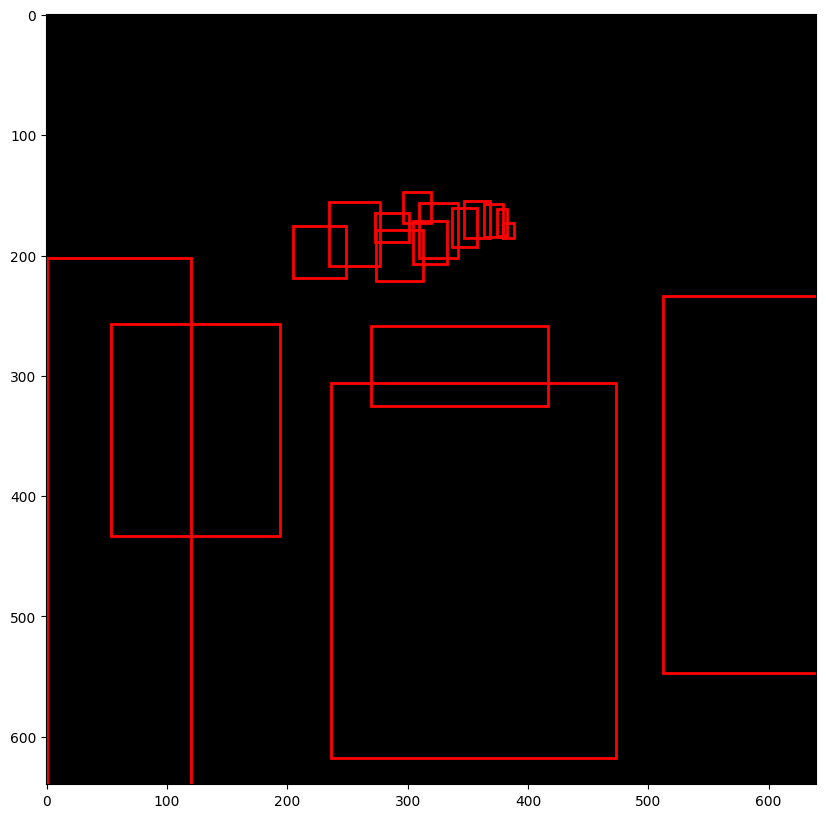

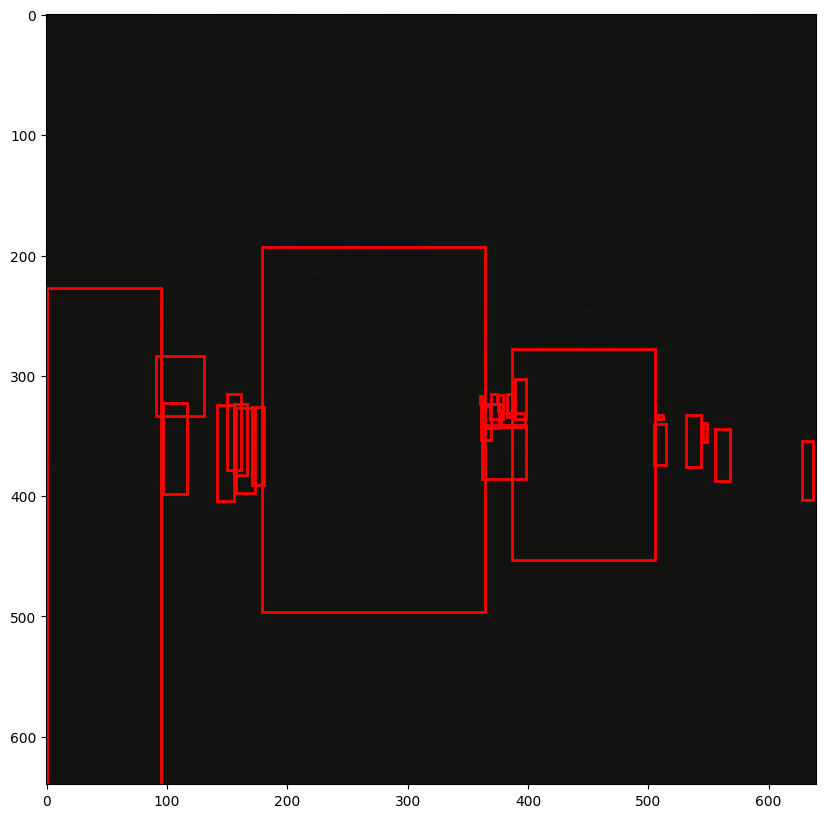

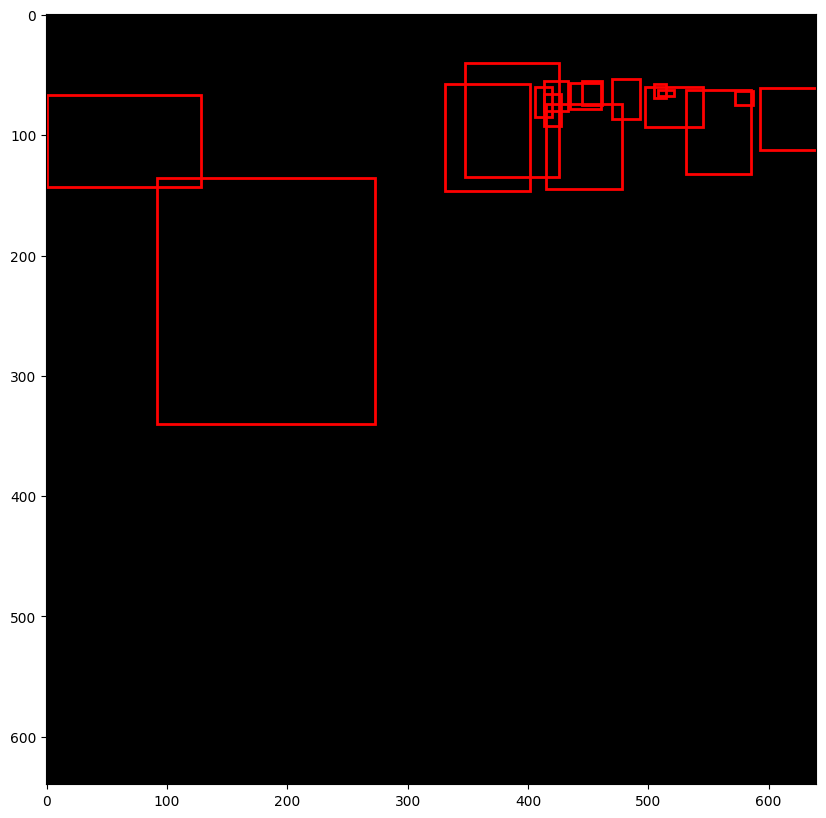

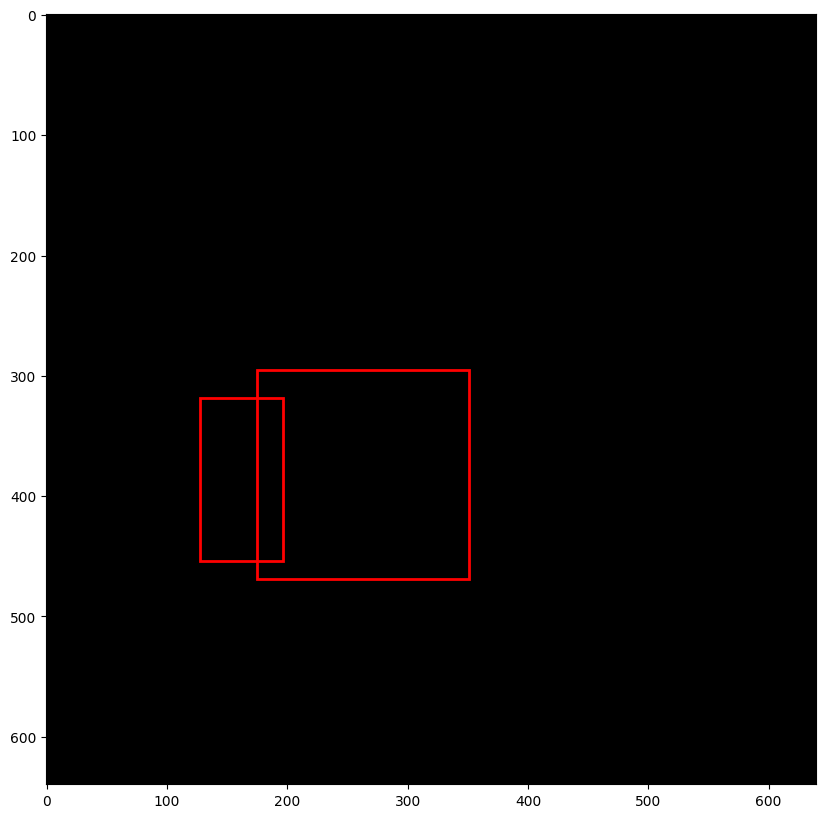

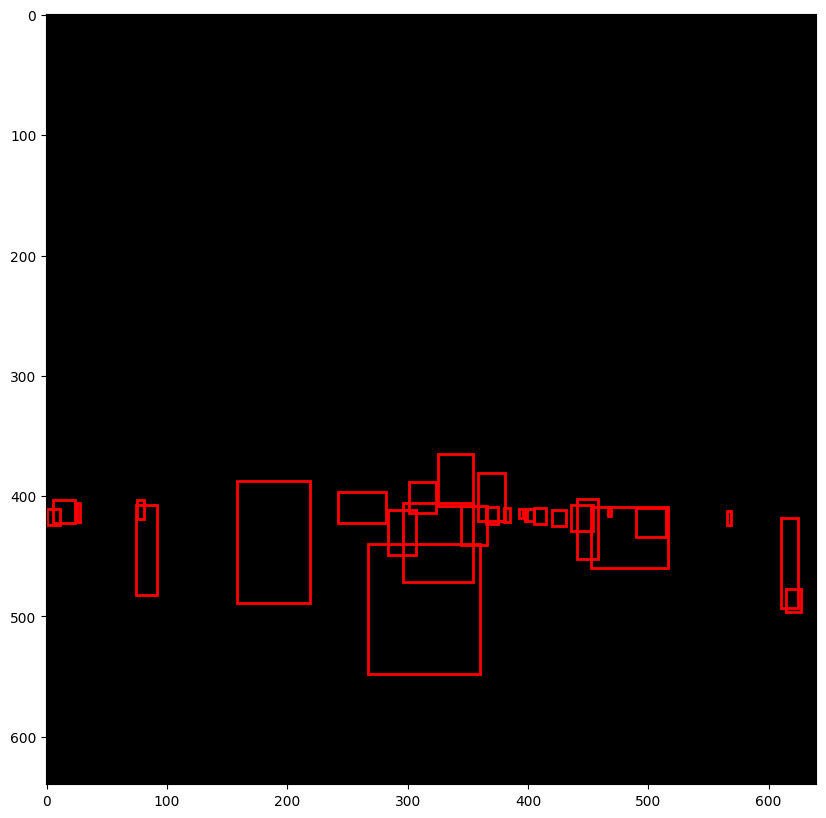

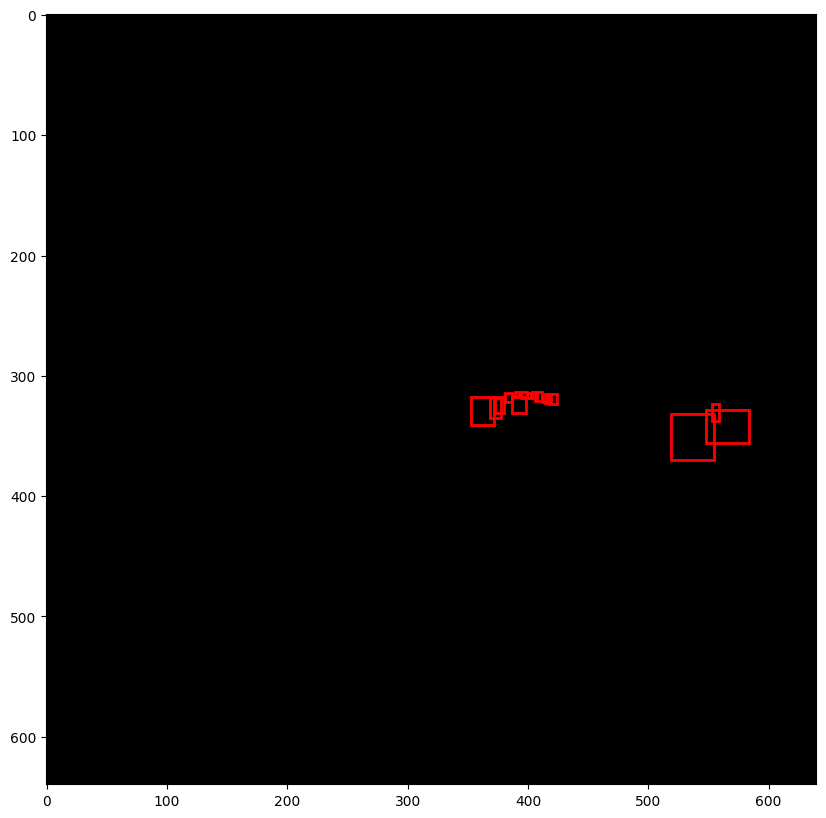

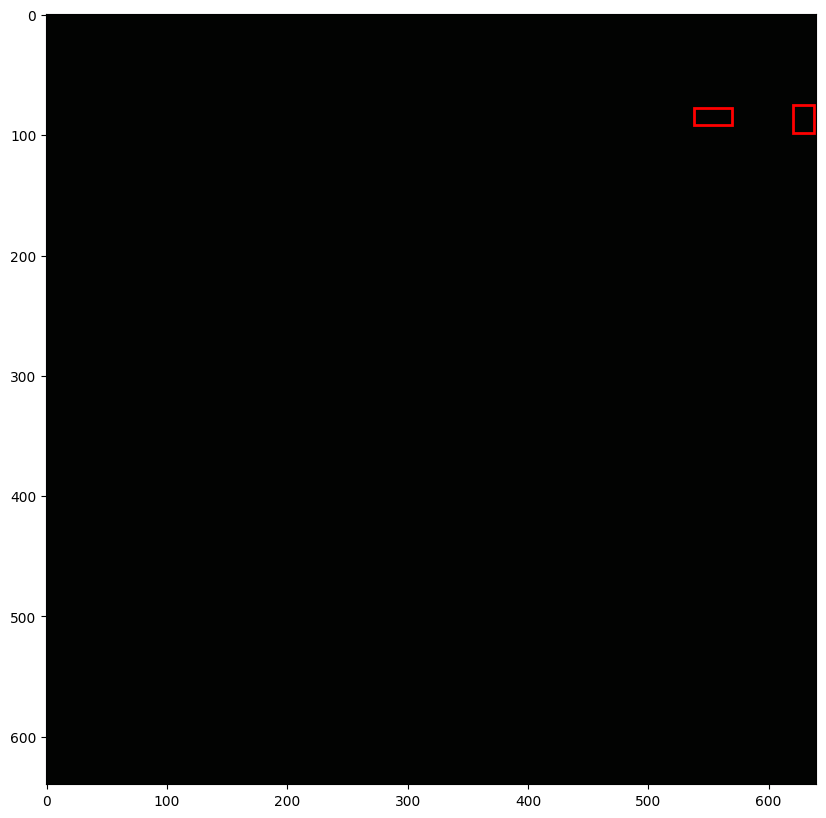

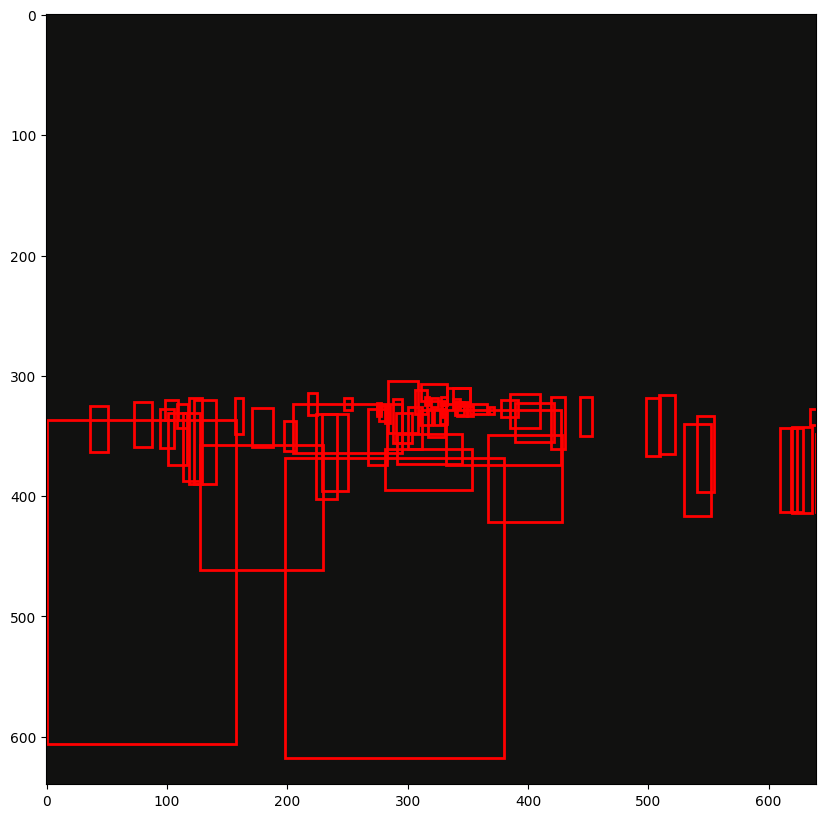

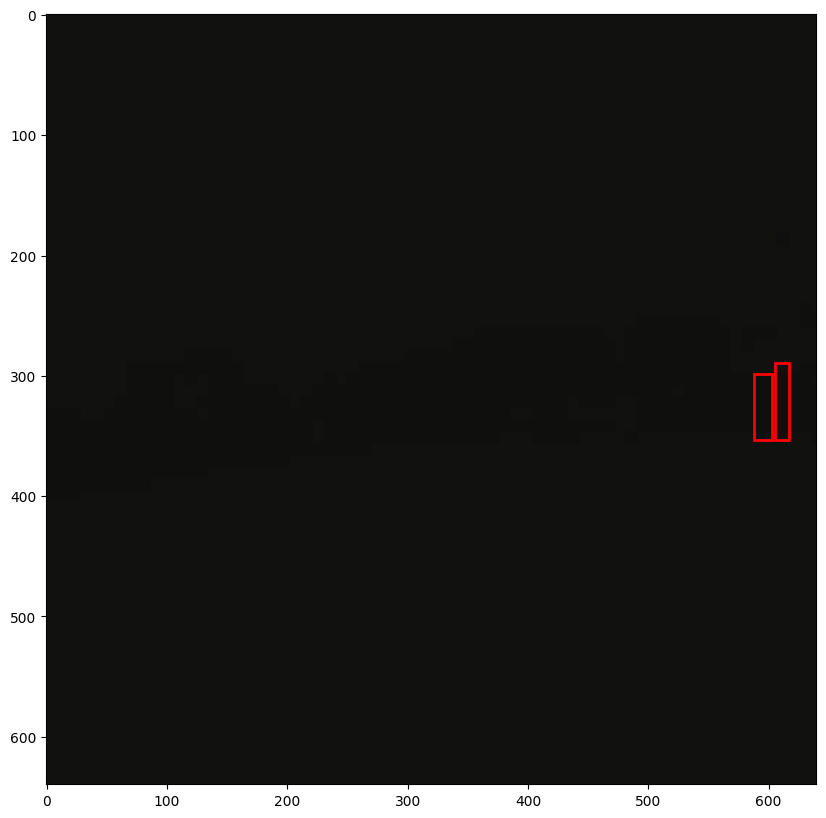

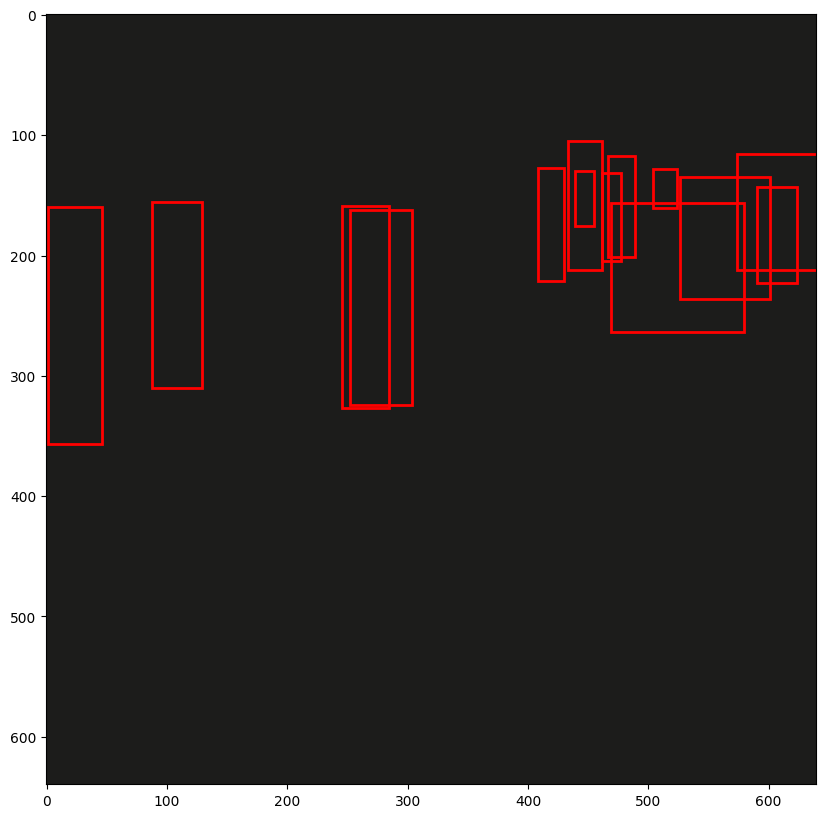

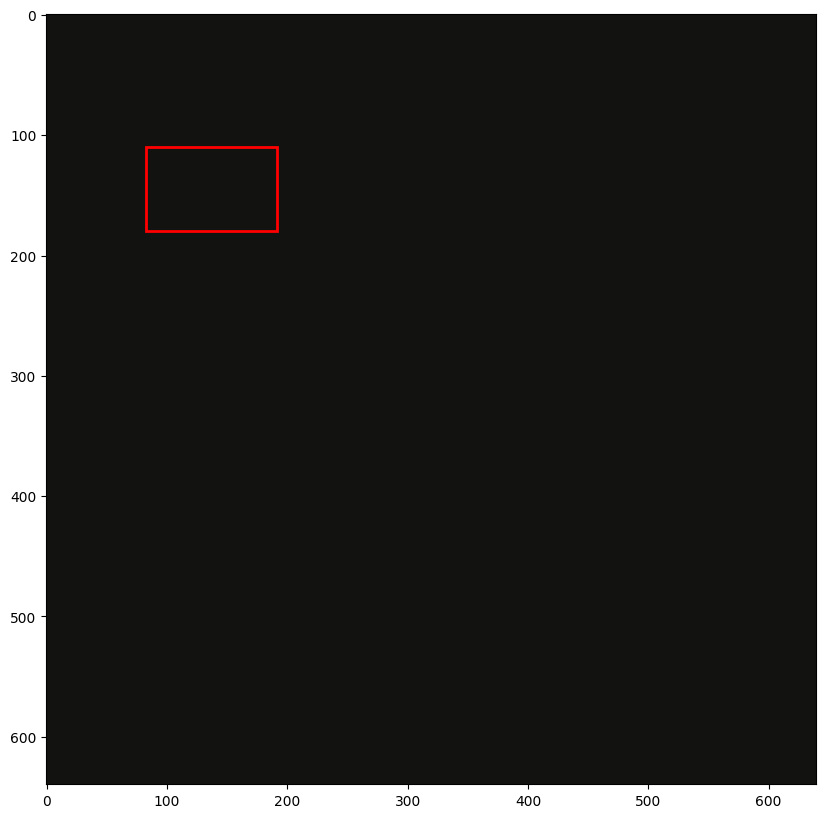

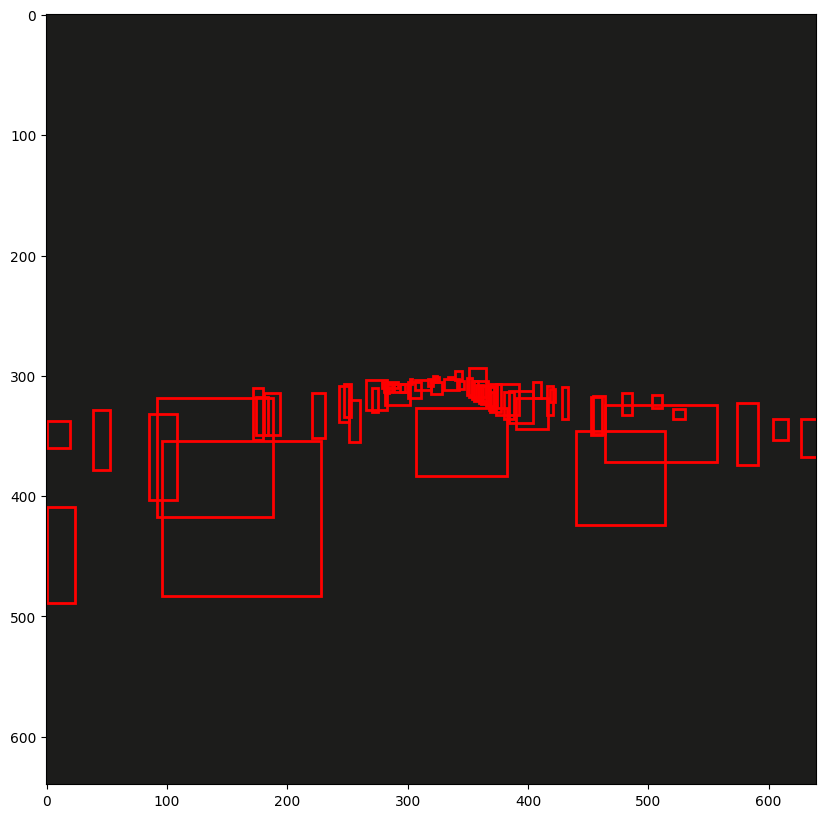

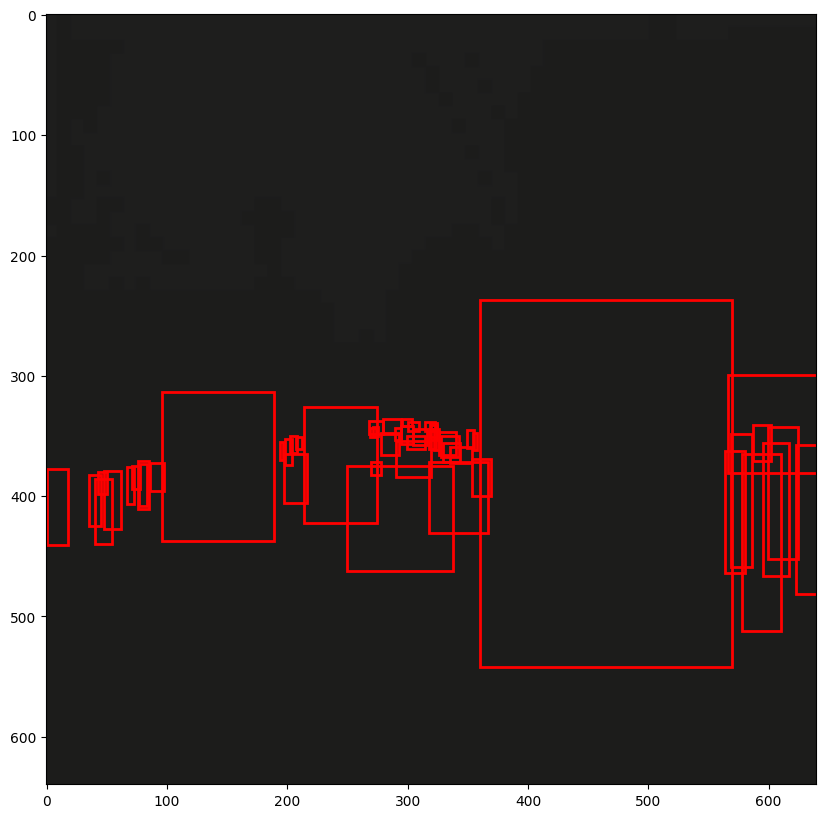

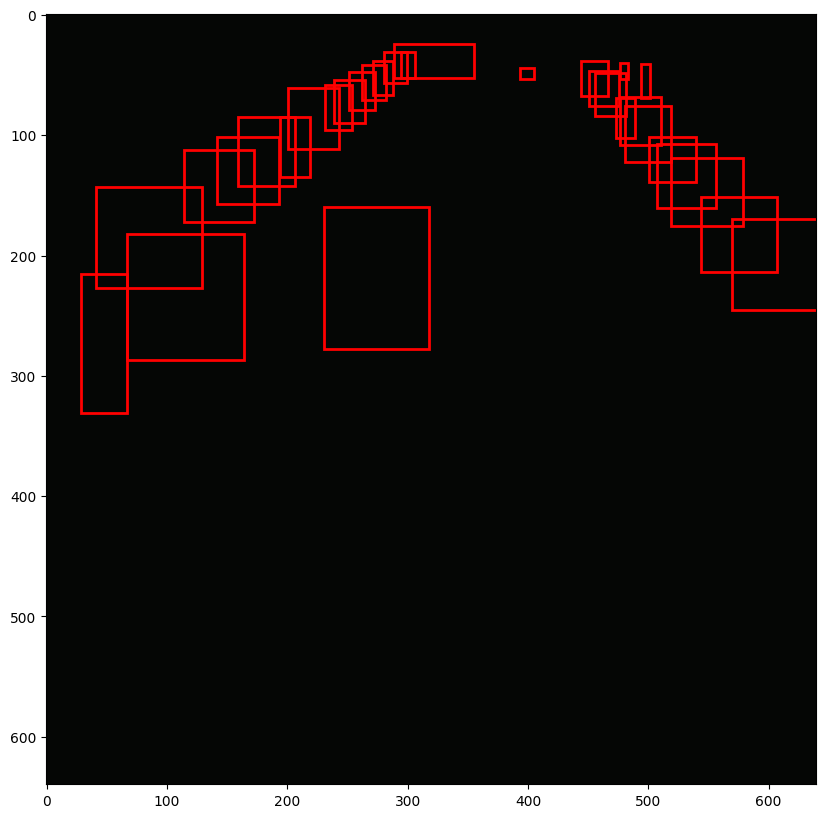

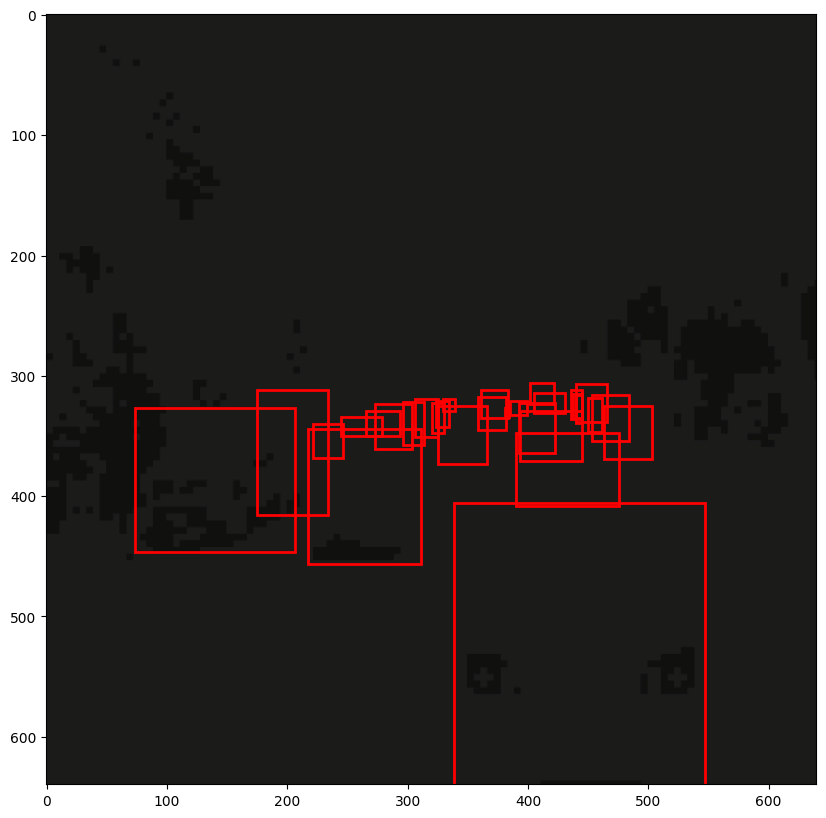

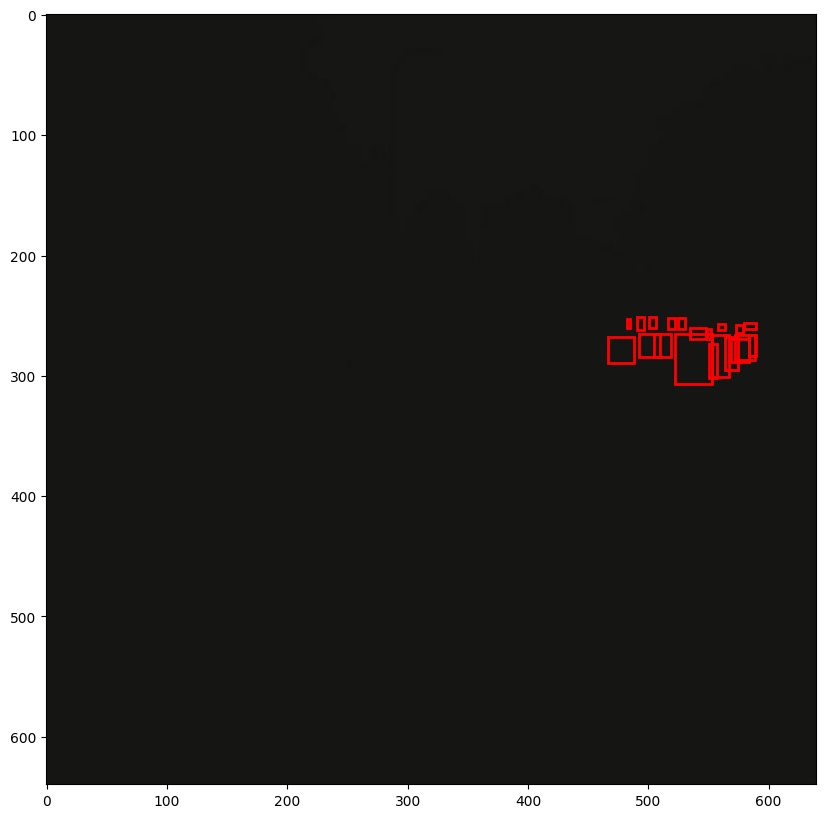

In [14]:
%matplotlib inline

for batch in train_dataset.take(10):
    display_batch(batch)